In [1]:
import pandas as pd
import gzip as gz
import numpy as np
import re
from matplotlib import pyplot as plt

## File preparation

In [2]:
path = 'C:\\Users\\jenny\\Documents\\NTNU\\my_supplementary_data\\sequences\\annotation\\'

KO_df = pd.read_csv(path + 'KO_extract.csv', header = 0, sep = '\t')
GO_df = pd.read_csv(path + 'GO_extract.csv', header = 0, sep = '\t')
COG_df = pd.read_csv(path + 'COG_extract.csv', header = 0, sep = '\t')

In [3]:
# process list in chunks
GO_list_df = np.array_split(GO_df, 500)

# extract GO terms, explode to one row per term, drop duplicates
for i in range(0,len(GO_list_df)):
    GO_list_df[i]['GO'] = GO_list_df[i]['GO'].str.split(",")
    GO_list_df[i] = GO_list_df[i].explode('GO')
    GO_list_df[i] = GO_list_df[i].drop_duplicates(keep = 'first')

# assemble chunks, drop duplicates and save
GO_df = pd.concat(GO_list_df)
GO_df = GO_df.drop_duplicates(keep = 'first')
GO_df.to_csv(path + 'terms_GO.csv')

In [4]:
# explode to one term per row, drop duplicates, save
KO_df['KO'] = KO_df['KO'].str.split(",")
KO_df = KO_df.explode('KO')
KO_df = KO_df.drop_duplicates(keep = 'first')
KO_df['KO'] = KO_df['KO'].str.split(':').str[1]

KO_df.to_csv(path + 'terms_KO.csv')

In [5]:
# to check data formats in COG_df column "COG"
# only deviation: "arCOG" instead of "COG", will be replaced by "COG" in the next cell
import re

deviations = list()
for cell in COG_df['COG']:
    if cell[0:3] != 'COG':
        pos = re.search('COG', cell).span()[0]
        dev = cell[0:pos]
        if dev not in deviations:
            deviations.append(dev)

print(deviations)

In [6]:
# process COG list in chunks
COG_list_df = np.array_split(COG_df, 500)

# extract most specific COG term, drop duplictes
for i in range(0,len(COG_list_df)):
    COG_list_df[i]['COG'] = COG_list_df[i]['COG'].str.split('@').str[0]
    COG_list_df[i] = COG_list_df[i].drop_duplicates(keep = 'first')

# assemble chunks, fix non-COG rows, drop duplicates, save.
COG_df = pd.concat(COG_list_df)
COG_df = COG_df[COG_df['COG'].str.contains('COG', na = False)]
COG_df['COG'] = COG_df['COG'].str.replace('arCOG', 'COG')
COG_df = COG_df.drop_duplicates(keep = 'first')
COG_df.to_csv(path + 'terms_COG.csv')

## Overview

In [16]:
KO_df = pd.read_csv(path + 'terms_KO.csv', header = 0, sep = ',', names = ['old_index', 'key', 'KO'])
GO_df = pd.read_csv(path + 'terms_GO.csv', header = 0, sep = ',', names = ['old_index', 'key', 'GO'])
COG_df = pd.read_csv(path + 'terms_COG.csv', header = 0, sep = ',', names = ['old_index','key','COG'])

Text(0.08, 0.5, 'Instances')

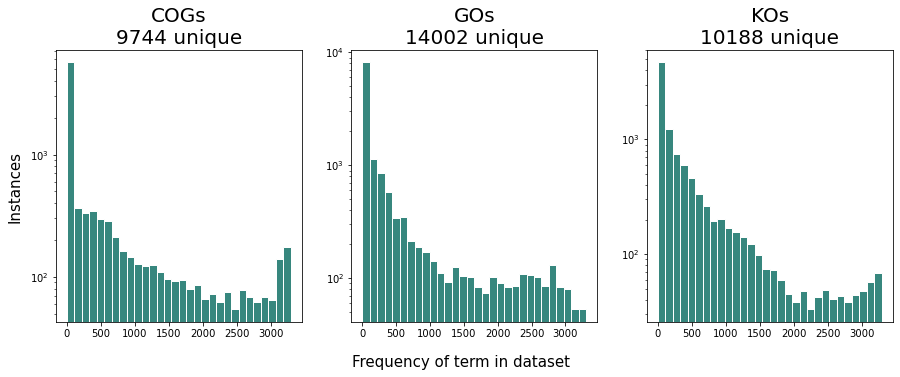

In [17]:
# plot overview of annotation terms: frequency of terms vs. # instances
# e.g. 100 terms have been associated with five sequences yields bar at x = 5, with height y = 100
# thus max x value is 3307 - i.e. term associated with all sequences
fig, axs = plt.subplots(1,3)

plt.sca(axs[0])
f = COG_df['COG'].value_counts().hist(bins = 30, 
                                  log = True,
                                  figsize = (15,5), 
                                  color = '#37877E',
                                  grid = False,
                                  edgecolor = '#ffffff')
plt.title('COGs\n'+str(COG_df['COG'].nunique())+' unique', fontsize = 20)


plt.sca(axs[1])
GO_df['GO'].value_counts().hist(bins = 30, 
                                  log = True,
                                  figsize = (15,5), 
                                  color = '#37877E',
                                  grid = False,
                                  edgecolor = '#ffffff')
plt.title('GOs\n'+str(GO_df['GO'].nunique())+' unique', fontsize = 20)

plt.sca(axs[2])
KO_df['KO'].value_counts().hist(bins = 30, 
                                  log = True,
                                  figsize = (15,5), 
                                  color = '#37877E',
                                  grid = False,
                                  edgecolor = '#ffffff')
plt.title('KOs\n'+str(KO_df['KO'].nunique())+' unique', fontsize = 20)

fig.text(0.5,0,'Frequency of term in dataset', ha = 'center', fontsize = 15)
fig.text(0.08,0.5,'Instances', va = 'center', fontsize = 15, rotation = 'vertical')

In [18]:
KO_df['KO'].value_counts()

K02892    3282
K02988    3282
K02895    3281
K02961    3279
K02876    3279
          ... 
K15647       1
K16179       1
K13507       1
K00541       1
K14407       1
Name: KO, Length: 10188, dtype: int64

In [19]:
GO_df['GO'].value_counts()

GO:0003674    3306
GO:0009987    3305
GO:0044237    3305
GO:0008150    3305
GO:0003824    3305
              ... 
GO:0070885       1
GO:0000750       1
GO:1904778       1
GO:1905803       1
GO:2000650       1
Name: GO, Length: 14002, dtype: int64

In [20]:
COG_df['COG'].value_counts()

COG0454     3290
COG0142     3288
COG1109     3287
COG0186     3286
COG0098     3285
            ... 
COG11680       1
COG06574       1
COG12051       1
COG09832       1
COG08826       1
Name: COG, Length: 9744, dtype: int64